In [1]:
import collections
import copy
import importlib
import os
import pathlib
from typing import Any, Mapping, Sequence

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import ray
import scipy
import seaborn as sns
import tensorflow as tf
from daaf import estimator_metrics
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

2024-03-22 18:11:35.382529: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 18:11:35.455923: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 18:11:35.456908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 18:11:37.040709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from utils import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/controljob/agg/1710783127/1711123071/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/30 [00:00<?, ?it/s]

2024-03-22 18:11:42,829	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

Read progress 0:   0%|          | 0/185 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [6]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,630,1710783127-1d9505bc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-25.917591125198097, -25.242472266244057, -27...","{'returns': {'mean': -26.38985736925515, 'std'...",PP/DMR
1,630,1710783127-1d89640b-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-36.30110935023772, -36.318541996830426, -36....","{'returns': {'mean': -35.62290015847861, 'std'...",PP/IMR
2,630,1710783127-1db0e303-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-34.00475435816165, -33.67194928684628, -34.0...","{'returns': {'mean': -34.005071315372426, 'std...",PP/LEAST
3,630,1710783127-1d5db710-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-33.450079239302696, -33.543581616481774, -33...","{'returns': {'mean': -33.55023771790809, 'std'...",PP/LEAST
4,630,1710783127-1d1a31c8-IceWorld,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-33.47226624405705, -33.75594294770206, -33.5...","{'returns': {'mean': -33.58858954041204, 'std'...",PP/LEAST
...,...,...,...,...,...,...
315995,1470,1710783127-fe6a0699-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-14.731475186947655, -15.038069340584636, -15...","{'returns': {'mean': -15.277090414683892, 'std...",PP/IMR
315996,1470,1710783127-fe6094fc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-126.26444595513256, -124.39836845683209, -12...","{'returns': {'mean': -125.84687287559481, 'std...",PP/IMR
315997,1470,1710783127-fec7d9c9-RedGreenSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-10.719918422841605, -9.496261046906866, -9.8...","{'returns': {'mean': -9.940516655336506, 'std'...",PP/LEAST
315998,1470,1710783127-fe818bf8-ABCSeq,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[-19.54180829367777, -19.250849762066622, -18....","{'returns': {'mean': -19.194017675050983, 'std...",PP/IMR


In [7]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'q-learning',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-38.24046866, -36.59401423, -36.54157405, -35.77078702,
        -35.88692312,   0.        , -33.25992091,   0.        ,
        -34.42030072, -32.37397904, -30.49810961,   0.        ,
          0.        , -29.57750584, -21.35853848,   0.        ]),
 'env': {'args': '{"map_name": "4x4"}',
  'level': '4x4',
  'name': 'IceWorld',
  '_level': '4KE3ASUFQGGUPERSDDRQAZAMA46CI2CMCJHGWJ7MRNI64JMEBETNDXFFPYWTQJF46S5BJ4NXXCHNMJSLII3ROYXI76DFOC3VAABGNVA='},
 'epsilon': 0.2,
 'exp_id': '1710783127-1d9505bc-IceWorld',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 4,
 'run_id': 12,
 'traj_mapping_method': 'DMR'}

In [8]:
df_wide_metrics = dataproc.wide_metrics(df_metrics)

In [9]:
len(df_wide_metrics["episode"].unique())

250

In [10]:
envs = dataproc.get_distinct_envs(df_wide_metrics)

In [11]:
envs

{('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}'}

## Comparison: 3-Sigma Test

In [12]:
PVALUE_THRESHOLD = 0.05

In [13]:
def calc_best_method(
    df_data, episode: int
):
    df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    for key in ("algorithm", "algorithm_args", "reward_period", "discount_factor"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])    
    for key in ("level", "name"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["env"][key])
        
    # drop sparse reward envs
    df_result = df_result[df_result["name"].apply(
        lambda name: any([word not in name for word in ("Frozen",)])
    )]
    

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    df_result["env"] =  df_result["name"] + "/" + df_result["level"]
    df_result["mean_returns"] = df_result["returns"].apply(lambda xs: np.mean(xs))    
    del df_result["meta"]    
    del df_result["name"]
    del df_result["level"]
    del df_result["exp_id"]
    
    algo_types = {
        "one-step": set(["sarsa", "q-learning"]),
        "n-step": set(["nstep-sarsa"]),
    }
    dfs = {}
    df_conf = {}
    for algo_type, algorithms in algo_types.items():
        df_algo = df_result[df_result["algorithm"].apply(lambda met: met in algorithms)]
        rows = []
        keys = ["env", "algorithm", "algorithm_args", "discount_factor", "reward_period"]
        method_reward_periods = collections.defaultdict(set)
        for row in df_algo[["method", "reward_period"]].drop_duplicates().to_dict("records"):
            method_reward_periods[row["method"]].add(row["reward_period"])

        df_baseline = df_algo[df_algo["reward_period"] == 1]
        baselines = {}
        for row in df_baseline.to_dict("records"):
            key = tuple(row[key] for key in keys)
            baselines[key] = row["returns"]

        rows = []
        # find the best across runs
        df_nobase = df_algo[df_algo["reward_period"] != 1]
        methods = sorted(df_nobase["method"].unique())        
        keys = ["env", "algorithm", "algorithm_args", "discount_factor", "reward_period"]
        for keys_values, group in df_nobase.groupby(keys):
            max_idx = group["mean_returns"].argmax()
            best_method = group.iloc[max_idx]["method"]            
            row = {
                key: value for key, value in zip(keys, keys_values)
            }

            for method in methods:
                if row["reward_period"] in method_reward_periods[method]:
                    row[method] = 1 if method == best_method else 0
                else:
                    row[method] = np.nan
            rows.append(row)
        df_best_method = pd.DataFrame(rows)
        agg_keys = ["env", "discount_factor", "reward_period"]
        df_best_method = df_best_method[agg_keys + methods].groupby(agg_keys).sum().reset_index()
        dfs[algo_type] = df_best_method
    return dfs

In [14]:
df_best_method = calc_best_method(df_metrics, episode=df_metrics["episode"].max())

In [15]:
print(df_best_method["one-step"].to_string())

                     env  discount_factor  reward_period  OP/OT  PP/DMR  PP/IMR  PP/LEAST
0            ABCSeq/n=10             0.99              2    0.0       0       0         2
1            ABCSeq/n=10             0.99              4    0.0       0       0         2
2            ABCSeq/n=10             0.99              6    0.0       0       0         2
3            ABCSeq/n=10             0.99              8    0.0       0       0         2
4            ABCSeq/n=10             0.99             16    0.0       0       0         2
5            ABCSeq/n=10             1.00              2    0.0       0       0         2
6            ABCSeq/n=10             1.00              4    0.0       0       0         2
7            ABCSeq/n=10             1.00              6    0.0       0       0         2
8            ABCSeq/n=10             1.00              8    0.0       0       0         2
9            ABCSeq/n=10             1.00             16    0.0       0       0         2
10        

In [16]:
print(df_best_method["n-step"].to_string())

                     env  discount_factor  reward_period  PP/IMR  PP/LEAST  PP/nTD-SU
0            ABCSeq/n=10             0.99              2       0         4          0
1            ABCSeq/n=10             0.99              4       0         4          0
2            ABCSeq/n=10             0.99              6       0         4          0
3            ABCSeq/n=10             0.99              8       0         4          0
4            ABCSeq/n=10             1.00              2       1         3          0
5            ABCSeq/n=10             1.00              4       0         4          0
6            ABCSeq/n=10             1.00              6       0         4          0
7            ABCSeq/n=10             1.00              8       1         3          0
8             ABCSeq/n=7             0.99              2       1         3          0
9             ABCSeq/n=7             0.99              4       0         4          0
10            ABCSeq/n=7             0.99             

In [17]:
def plot_best_method(df_data, suffix: str, output_dir="figures/bestmethod"):
    envs = sorted(df_data["env"].unique())
    discount_factors = sorted(df_data["discount_factor"].unique())
    reward_periods = sorted(df_data["reward_period"].unique())
    H_SIZE = 3
    
    fig, axes = plt.subplots(nrows=len(discount_factors), ncols=len(reward_periods), figsize=(4*len(reward_periods), 4*H_SIZE), sharey=True)
    for row, discount_factor in enumerate(discount_factors):
        df_discount = df_data[df_data["discount_factor"] == discount_factor].drop(["discount_factor"], axis=1)
        df_discount = pd.melt(
            df_discount, 
            id_vars=["env", "reward_period"]
        )
        # one matrix per reward period, not env
        for col, rp in enumerate(reward_periods):
            ax = axes[row, col]
            df_plot = df_discount[df_discount["reward_period"] == rp]
            df_plot = df_plot.rename(mapper={
                "variable": "Method", 
                "reward_period": "Reward Period",
                "env": "Environment",
            }, axis=1)
            df_plot = df_plot.pivot(index="Environment", columns="Method", values="value")
            sns.heatmap(df_plot, ax=ax, annot=True)
            ax.set_title(f"$P$ = {rp}, $\gamma$ = {discount_factor}")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    name = f"bestmethod_{suffix}.pdf"
    path = os.path.join(output_dir, name)
    plt.savefig(path, dpi=300, format="pdf", bbox_inches = "tight")

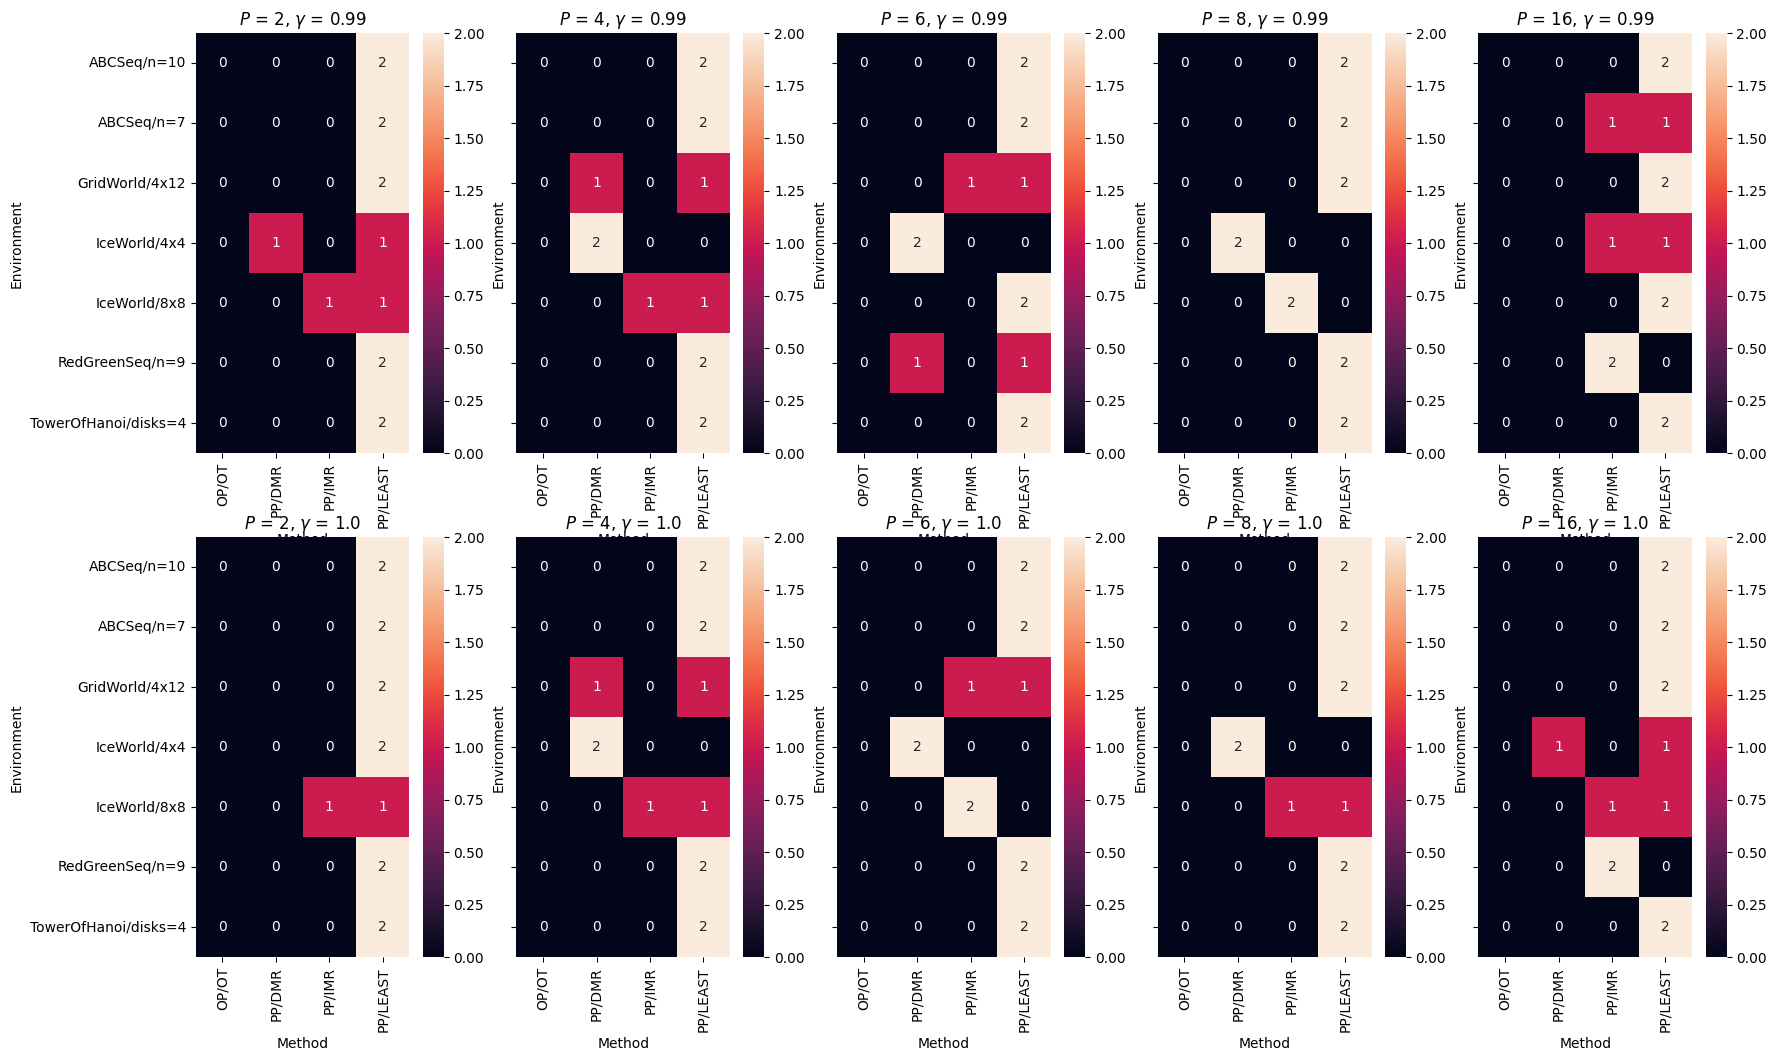

In [18]:
plot_best_method(df_best_method["one-step"], suffix="one-step")

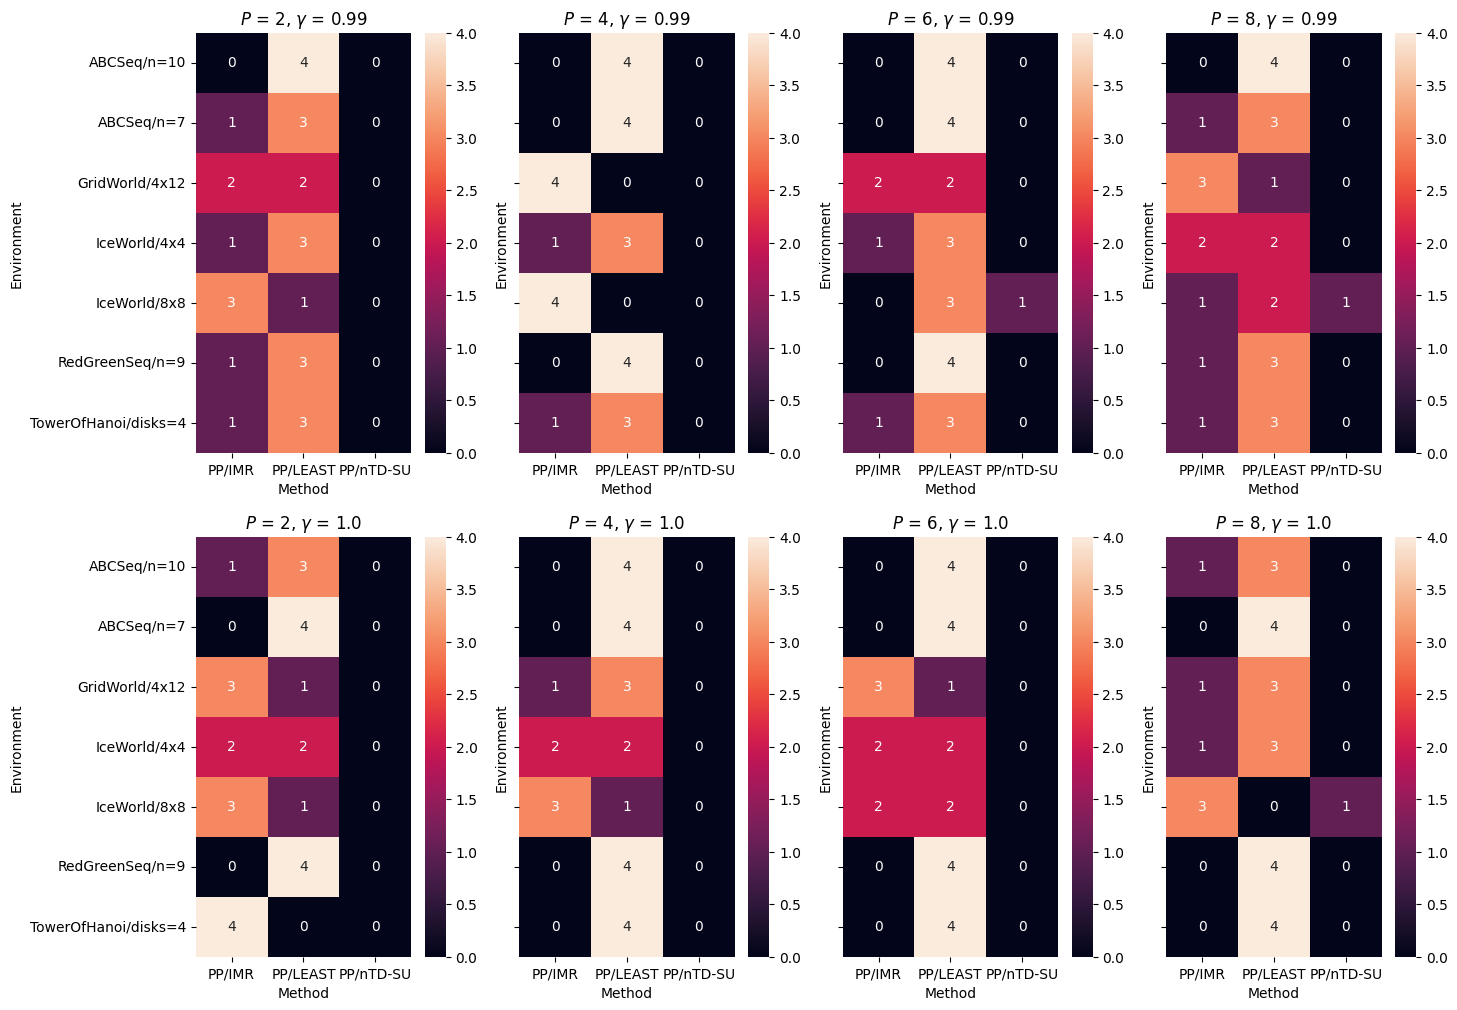

In [19]:
plot_best_method(df_best_method["n-step"], suffix="n-step")